In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, classification_report

In [77]:
df = pd.read_csv(r'C:\Users\UMER\Documents\UNI_WORK\DSc_Class\Project\codsoft_task1\Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.shape

(891, 12)

In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sobey, Mr. Samuel James Hayden",male,1601,B96 B98,S
freq,1,577,7,4,644


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
df.duplicated().sum()

0

In [84]:
df.drop('Cabin', axis = 1, inplace = True)

In [85]:
df.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [86]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [87]:
df.dropna(inplace= True)

In [88]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Visualisation:

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
df.describe(include='O')

,Name,Sex,Ticket,Embarked
count,889,889,889,889
unique,889,2,680,3
top,"Sobey, Mr. Samuel James Hayden",male,1601,S
freq,1,577,7,644


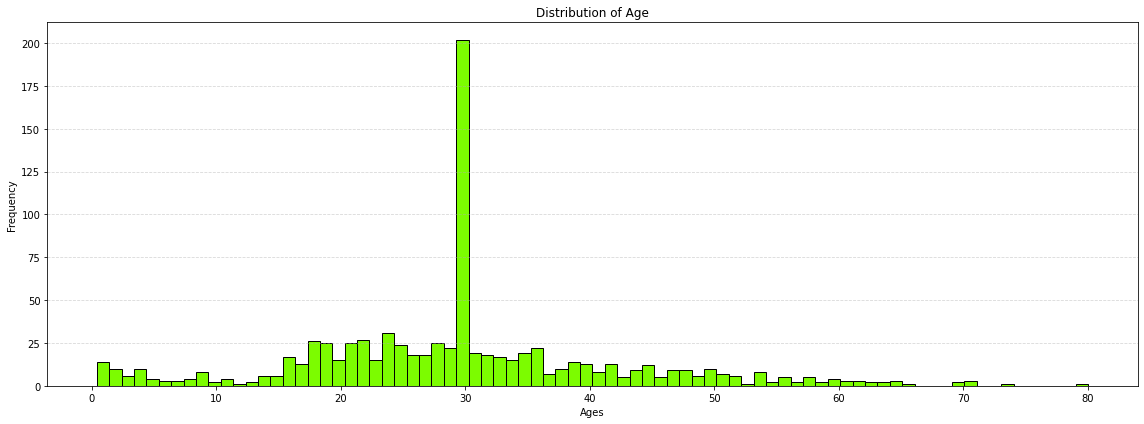

In [93]:
plt.figure(figsize=(16, 6))
plt.hist(df['Age'], bins = 80,color = 'lawngreen', edgecolor = 'black')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

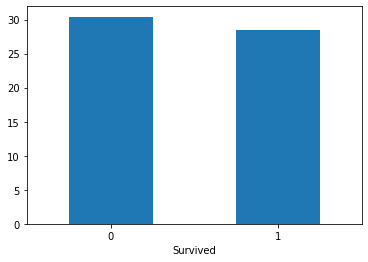

In [94]:
df.groupby('Survived')['Age'].mean().plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

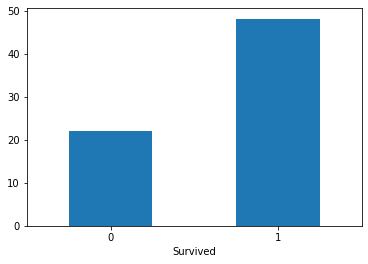

In [95]:
df.groupby('Survived')['Fare'].mean().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

In [96]:
sv_class = df[['Survived', 'Pclass']].value_counts().reset_index()
sv_class

,Survived,Pclass,0
0,0,3,372
1,1,1,134
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


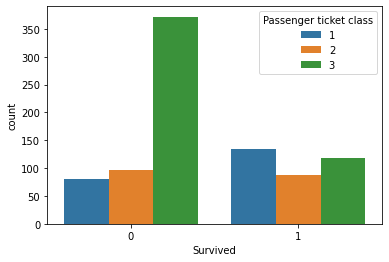

In [97]:
sns.countplot(data = df, x = 'Survived', hue = 'Pclass')
plt.legend(title = 'Passenger ticket class')
plt.show()

In [98]:
sv_sex = df[['Survived','Sex']].value_counts().reset_index()
sv_sex

,Survived,Sex,0
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


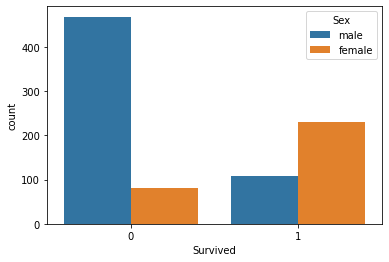

In [99]:
sns.countplot(data = df, x = 'Survived',hue = 'Sex')
plt.legend(title = 'Sex')
plt.show()

In [100]:
sv_em = df[['Survived', 'Embarked']].value_counts().reset_index()
sv_em

,Survived,Embarked,0
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


In [101]:
sv_sibling = df[['Survived', 'SibSp']].value_counts().reset_index()
sv_sibling

,Survived,SibSp,0
0,0,0,398
1,1,0,208
2,1,1,112
3,0,1,97
4,0,4,15
5,0,2,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


Model Training

In [102]:
data = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [103]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [104]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [106]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)

LogisticRegression()

In [107]:
lr.score(X_train, y_train)

0.7990353697749196

In [108]:
lr.score(X_test, y_test)

0.7902621722846442

In [109]:
predictions = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)

In [110]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       167
           1       0.71      0.74      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [111]:
new_data = pd.DataFrame({'Pclass':[3],'Sex':[0],'Age':[32],'SibSp':[1],'Parch':[1],'Fare':[21],'Embarked':[0]})

In [112]:
prediction= lr.predict(new_data)
if prediction == 0:
    print("Passenger didn't survive")
else:
    print("Passenger survived")

Passenger survived
